In [5]:
import pandas as pd
train_data = pd.read_csv("/Users/niki/code/Niki827/watt_squad/raw_data/train.csv")
test_data = pd.read_csv("/Users/niki/code/Niki827/watt_squad/raw_data/test.csv")

# Renaming columns
train_data.rename(columns={'time': 'timestamp'}, inplace=True)
train_data.rename(columns={'consumption': 'actual_consumption'}, inplace=True)
train_data.rename(columns={'spot_market_price': 'electricity_price'}, inplace=True)

test_data.rename(columns={'time': 'timestamp'}, inplace=True)
test_data.rename(columns={'consumption': 'actual_consumption'}, inplace=True)
test_data.rename(columns={'spot_market_price': 'electricity_price'}, inplace=True)

# Calculating total actual_production
train_data['actual_production'] = train_data['pv_production'] + train_data['wind_production']
test_data['actual_production'] = test_data['pv_production'] + test_data['wind_production']

# Dropping irrelevant columns
train_data = train_data[['timestamp', 'actual_consumption', 'actual_production', 'electricity_price']]
test_data = test_data[['timestamp', 'actual_consumption', 'actual_production', 'electricity_price']]

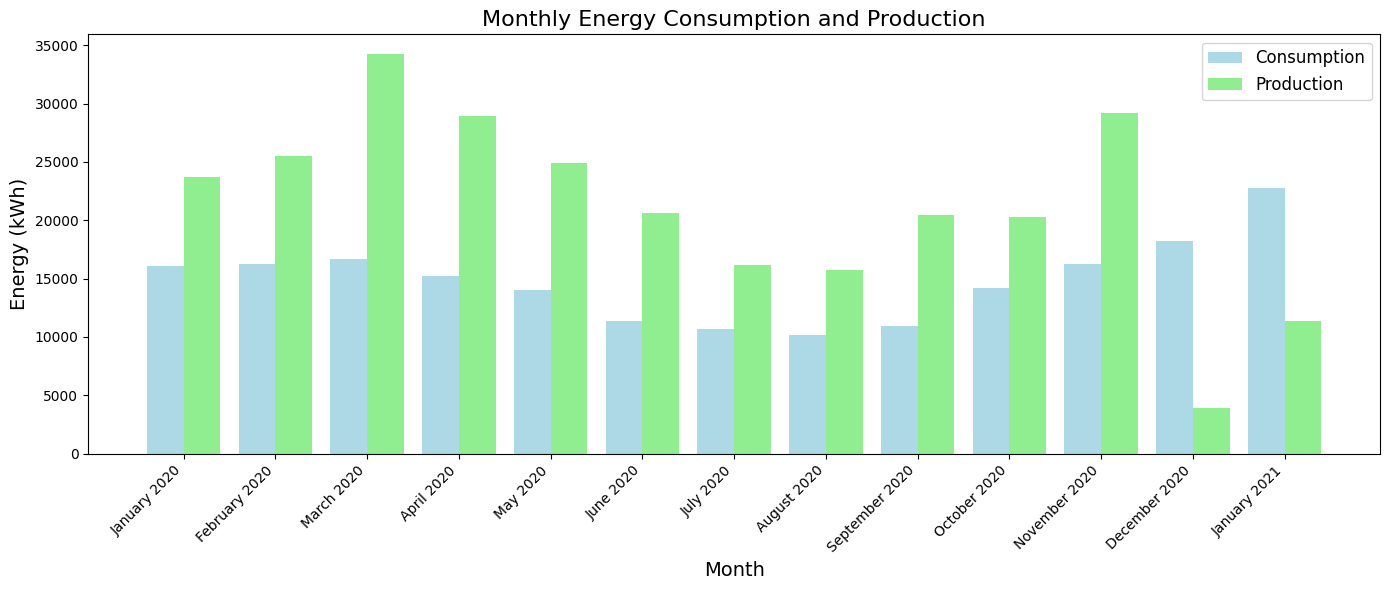

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the 'timestamp' column is in datetime format
train_data['timestamp'] = pd.to_datetime(train_data['timestamp'])

# Extract month and year for grouping
train_data['month_year'] = train_data['timestamp'].dt.to_period('M')

# Aggregate actual consumption and production by month
monthly_data = train_data.groupby('month_year')[['actual_consumption', 'actual_production']].sum().reset_index()

# Convert month_year to a datetime format for plotting and format as 'January 2020'
monthly_data['month_year'] = monthly_data['month_year'].dt.to_timestamp()
monthly_data['month_year_str'] = monthly_data['month_year'].dt.strftime('%B %Y')

# Plot the data
x = range(len(monthly_data))  # Numeric x-axis positions for the months
width = 0.4  # Width of each bar

plt.figure(figsize=(14, 6))

# Plot consumption bars
plt.bar([pos - width / 2 for pos in x], monthly_data['actual_consumption'], 
        color='lightblue', width=width, label='Consumption')

# Plot production bars
plt.bar([pos + width / 2 for pos in x], monthly_data['actual_production'], 
        color='lightgreen', width=width, label='Production')

# Formatting the plot
plt.title('Monthly Energy Consumption and Production', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Energy (kWh)', fontsize=14)
plt.xticks(x, monthly_data['month_year_str'], rotation=45, ha='right', fontsize=10)
plt.legend(fontsize=12)
plt.tight_layout()

# Show